In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Initialize weights and learning rate
W = np.array([10, 0.2, -0.75])
alpha = 0.05

# Step 2: AND gate logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

In [3]:
# Step 3: Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

In [4]:
# Step 4: Perceptron learning algorithm for different activation functions
def perceptron(X, Y, W, alpha, activation_function):
    epoch = 0
    errors = []
    while True:
        error_sum = 0
        for i in range(len(X)):
            x = np.insert(X[i], 0, 1)  # Add bias term
            y = Y[i]
            output = activation_function(np.dot(W, x))
            error = y - output
            error_sum += error**2
            W = W + alpha * error * x
        errors.append(error_sum)
        epoch += 1
        if error_sum <= 0.002 or epoch == 1000:  # Stop if error is less than or equal to 0.002 or max epochs reached
            break
    return W, errors, epoch
def perceptron1(X, Y, W, alpha):
    epoch = 0
    errors = []
    while True:
        error_sum = 0
        for i in range(len(X)):
            x = np.insert(X[i], 0, 1)  # Add bias term
            y = Y[i]
            output = step_activation(np.dot(W, x))
            error = y - output
            error_sum += error**2
            W = W + alpha * error * x
        errors.append(error_sum)
        epoch += 1
        if error_sum == 0 or epoch == 1000:  # Stop if weights converge or max epochs reached
            break
    return W, errors

In [5]:
# Train the perceptron with different activation functions and compare the number of iterations taken to converge
W, errors, epochs = perceptron(X, Y, W, alpha, step_activation)
print(f'Step activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, bipolar_step_activation)
print(f'Bipolar step activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, sigmoid_activation)
print(f'Sigmoid activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, relu_activation)
print(f'ReLU activation: {epochs} epochs')

Step activation: 130 epochs
Bipolar step activation: 1000 epochs
Sigmoid activation: 1000 epochs
ReLU activation: 20 epochs


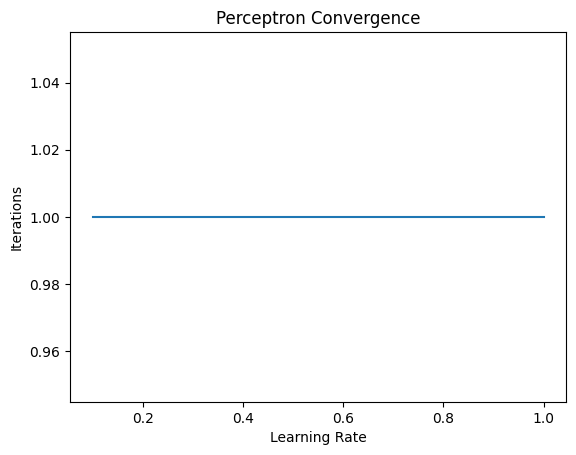

In [6]:
#Perceptron learning algorithm for different learning rates
def perceptron2(X, Y, W, alpha):
    epoch = 0
    errors = []
    while True:
        error_sum = 0
        for i in range(len(X)):
            x = np.insert(X[i], 0, 1)  # Add bias term
            y = Y[i]
            output = step_activation(np.dot(W, x))
            error = y - output
            error_sum += error**2
            W = W + alpha * error * x
        errors.append(error_sum)
        epoch += 1
        if error_sum <= 0.002 or epoch == 1000:  # Stop if error is less than or equal to 0.002 or max epochs reached
            break
    return epoch
# Train the perceptron with different learning rates and plot the number of iterations taken to converge
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = [perceptron2(X, Y, W, alpha) for alpha in learning_rates]
plt.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations')
plt.title('Perceptron Convergence')
plt.show()

Step activation: 1000 epochs
Bipolar step activation: 1000 epochs
Sigmoid activation: 1000 epochs
ReLU activation: 1000 epochs


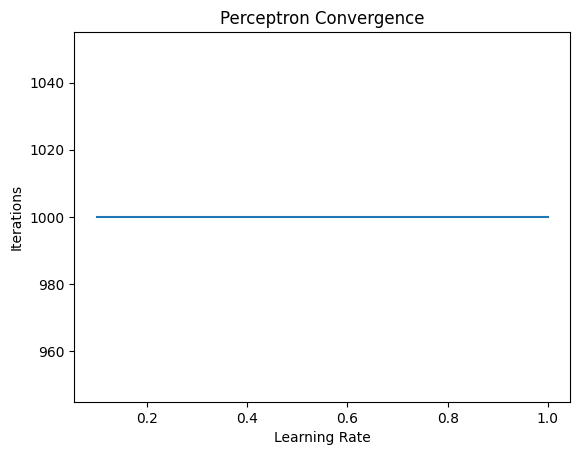

In [7]:
# A4: XOR gate logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Train the perceptron with different activation functions and compare the number of iterations taken to converge
W, errors, epochs = perceptron(X, Y, W, alpha, step_activation)
print(f'Step activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, bipolar_step_activation)
print(f'Bipolar step activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, sigmoid_activation)
print(f'Sigmoid activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, relu_activation)
print(f'ReLU activation: {epochs} epochs')

# Train the perceptron with different learning rates and plot the number of iterations taken to converge
iterations = [perceptron(X, Y, W, alpha, step_activation)[2] for alpha in learning_rates]
plt.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations')
plt.title('Perceptron Convergence')
plt.show()

In [8]:
# Step 1: Data Preparation
data = np.array([
    [20, 6, 2, 1],
    [16, 3, 6, 1],
    [27, 6, 2, 1],
    [19, 1, 2, 0],
    [24, 4, 2, 1],
    [22, 1, 5, 0],
    [15, 4, 2, 1],
    [18, 4, 2, 1],
    [21, 1, 4, 0],
    [16, 2, 4, 0]
])

# Separate features and target
X = data[:, :-1]
y = data[:, -1]

# Step 2: Initialize Weights and Learning Rate
weights = np.random.rand(X.shape[1])
learning_rate = 0.01# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Step 3: Training the Perceptron
for epoch in range(1000):
    for i in range(X.shape[0]):
        # Forward pass
        z = np.dot(X[i], weights)
        prediction = sigmoid(z)
        
        # Calculate the error
        error = y[i] - prediction
        
        # Backpropagation
        weights += learning_rate * error * sigmoid_derivative(prediction) * X[i]

# Step 4: Evaluation
for i in range(X.shape[0]):
    z = np.dot(X[i], weights)
    prediction = sigmoid(z)
    print(f"Transaction {i+1}: Predicted High Value = {prediction > 0.5}")

Transaction 1: Predicted High Value = True
Transaction 2: Predicted High Value = True
Transaction 3: Predicted High Value = True
Transaction 4: Predicted High Value = False
Transaction 5: Predicted High Value = True
Transaction 6: Predicted High Value = False
Transaction 7: Predicted High Value = True
Transaction 8: Predicted High Value = True
Transaction 9: Predicted High Value = False
Transaction 10: Predicted High Value = False


In [9]:
# Step 1: Add a column of ones to the input data
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Step 2: Compute the pseudo-inverse of the input data
X_pinv = np.linalg.pinv(X_bias)

# Step 3: Multiply the pseudo-inverse with the output data to get the weights
weights_pinv = np.dot(X_pinv, y)

# Output after pseudo-inverse method
print("Weights after pseudo-inverse:", weights_pinv)
print("Output after pseudo-inverse:", sigmoid_activation(np.dot(X_bias, weights_pinv)))

Weights after pseudo-inverse: [ 0.1139903  -0.02342675  0.2607237   0.03727212]
Output after pseudo-inverse: [0.78318792 0.67808085 0.75405445 0.50103748 0.66132115 0.51141952
 0.70682803 0.69205576 0.50795949 0.60101549]


In [10]:
def train_neural_network(X, Y, alpha=0.05, iterations=1000):
    np.random.seed(0)
    weights1 = np.random.random((2, 2)) - 0.5
    weights2 = np.random.random((2, 1)) - 0.5

    # Sigmoid activation function and its derivative
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(x):
        return x * (1 - x)

    # Forward and backward propagation
    for _ in range(iterations):
        layer0 = X
        layer1 = sigmoid(np.dot(layer0, weights1))
        layer2 = sigmoid(np.dot(layer1, weights2))

        layer2_error = Y - layer2
        if (layer2_error**2).mean() <= 0.002:
            break

        layer2_delta = layer2_error * sigmoid_derivative(layer2)
        layer1_error = layer2_delta.dot(weights2.T)
        layer1_delta = layer1_error * sigmoid_derivative(layer1)

        weights2 += layer1.T.dot(layer2_delta) * alpha
        weights1 += layer0.T.dot(layer1_delta) * alpha

    return layer2
# AND gate logic
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_AND = np.array([[0], [0], [0], [1]])

# XOR gate logic
X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_XOR = np.array([[0], [1], [1], [0]])

# Train the neural network for AND and XOR gate logic
output_AND = train_neural_network(X_AND, Y_AND)
output_XOR = train_neural_network(X_XOR, Y_XOR)

print("Output for AND gate after training:")
print(output_AND)

print("Output for XOR gate after training:")
print(output_XOR)

Output for AND gate after training:
[[0.1786141 ]
 [0.27262763]
 [0.26866913]
 [0.35974482]]
Output for XOR gate after training:
[[0.49966448]
 [0.49926446]
 [0.50078119]
 [0.50037807]]


Step activation: 130 epochs
Bipolar step activation: 1000 epochs
Sigmoid activation: 1000 epochs
ReLU activation: 1000 epochs


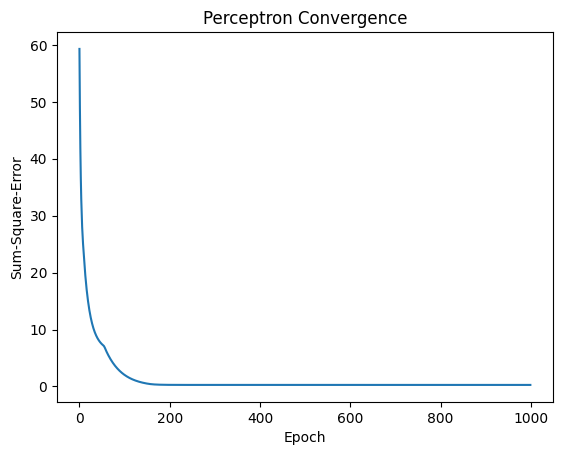

In [11]:
# Step 1: Initialize weights and learning rate
W = np.array([[10, 0.2, -0.75], [10, 0.2, -0.75]])  # Two sets of weights for two output nodes
alpha = 0.05

# Step 2: AND gate logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Modify the output to match the new format

# Step 3: Activation functions remain the same

# Step 4: Modify the perceptron learning algorithm to handle two output nodes
def perceptron(X, Y, W, alpha, activation_function):
    epoch = 0
    errors = []
    while True:
        error_sum = 0
        for i in range(len(X)):
            x = np.insert(X[i], 0, 1)  # Add bias term
            y = Y[i]
            output = np.array([activation_function(np.dot(W[j], x)) for j in range(len(W))])  # Calculate output for each node
            error = y - output
            error_sum += np.sum(error**2)
            W = W + alpha * np.outer(error, x)  # Update weights for each node
        errors.append(error_sum)
        epoch += 1
        if error_sum <= 0.002 or epoch == 1000:  # Stop if error is less than or equal to 0.002 or max epochs reached
            break
    return W, errors, epoch# Train the perceptron and plot the errors
W, errors, epochs = perceptron(X, Y, W, alpha, step_activation)
print(f'Step activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, bipolar_step_activation)
print(f'Bipolar step activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, sigmoid_activation)
print(f'Sigmoid activation: {epochs} epochs')
W, errors, epochs = perceptron(X, Y, W, alpha, relu_activation)
print(f'ReLU activation: {epochs} epochs')

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Sum-Square-Error')
plt.title('Perceptron Convergence')
plt.show()

In [12]:
from sklearn.neural_network import MLPClassifier

# AND Gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

print("AND Gate")
print(clf.predict(X))

# XOR Gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

print("XOR Gate")
print(clf.predict(X))

AND Gate
[0 0 0 1]
XOR Gate
[0 0 1 0]
